In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('./data/challenge-2-bitcoin.csv')
df.shape

(2920, 24)

In [6]:
data = df[['btc_market_price','btc_total_bitcoins','btc_transaction_fees']]
data.shape,data.head()


((2920, 3),
    btc_market_price  btc_total_bitcoins  btc_transaction_fees
 0               0.0           2110700.0                   0.0
 1               0.0           2120200.0                   0.0
 2               0.0           2127600.0                   0.0
 3               0.0           2136100.0                   0.0
 4               0.0           2144750.0                   0.0)

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'btc_transaction_fees')

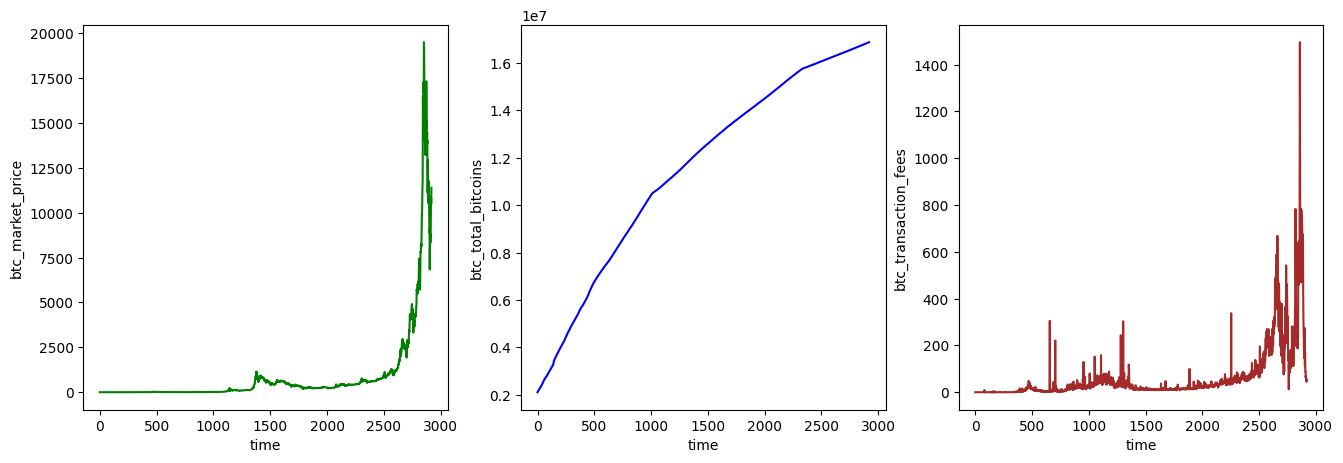

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
axes[0].plot(data['btc_market_price'], 'green')
axes[0].set_xlabel('time')
axes[0].set_ylabel('btc_market_price')

axes[1].plot(data['btc_total_bitcoins'], 'blue')
axes[1].set_xlabel('time')
axes[1].set_ylabel('btc_total_bitcoins')

axes[2].plot(data['btc_transaction_fees'], 'brown')
axes[2].set_xlabel('time')
axes[2].set_ylabel('btc_transaction_fees')

In [11]:
def split_dataset():
    """
    参数:
    无

    返回:
    X_train, y_train, X_test, y_test -- 训练集特征、训练集目标、测试集特征、测试集目标
    """

    ### 代码开始 ### (≈ 6 行代码)
    
    train_data = data[:int(len(data)*0.7)]
    test_data = data[int(len(data)*0.7):]
    
    X_train = train_data[['btc_total_bitcoins', 'btc_transaction_fees']]
    y_train = train_data[['btc_market_price']]
    
    X_test = test_data[['btc_total_bitcoins', 'btc_transaction_fees']]
    y_test = test_data[['btc_market_price']]
    ### 代码结束 ###

    return X_train, y_train, X_test, y_test

In [13]:
split_dataset()

(      btc_total_bitcoins  btc_transaction_fees
 0              2110700.0              0.000000
 1              2120200.0              0.000000
 2              2127600.0              0.000000
 3              2136100.0              0.000000
 4              2144750.0              0.000000
 ...                  ...                   ...
 2038          14645050.0             27.900742
 2039          14648675.0             24.265468
 2040          14652725.0             27.125537
 2041          14656525.0             25.689093
 2042          14660125.0             20.986937
 
 [2043 rows x 2 columns],
       btc_market_price
 0                 0.00
 1                 0.00
 2                 0.00
 3                 0.00
 4                 0.00
 ...                ...
 2038            229.95
 2039            233.90
 2040            235.79
 2041            233.76
 2042            232.85
 
 [2043 rows x 1 columns],
       btc_total_bitcoins  btc_transaction_fees
 2043          14663600.0       

In [14]:
len(split_dataset()[0]), len(split_dataset()[1]), len(split_dataset()[2]), len(split_dataset()[
    3]), split_dataset()[0].shape, split_dataset()[1].shape, split_dataset()[2].shape, split_dataset()[3].shape

(2043, 2043, 877, 877, (2043, 2), (2043, 1), (877, 2), (877, 1))

In [15]:
# 加载必要模块
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [16]:
X_train ,y_train,X_test,y_test = split_dataset()



   多项式 $ X=\begin{bmatrix}X_1,X_2,X_1^2,X_1X_2,X_2^2\end{bmatrix} $

In [17]:
def poly3():

    ### 代码开始 ### (≈ 7 行代码)
    poly_features = PolynomialFeatures(degree=3, include_bias=False)
    poly_X_train = poly_features.fit_transform(X_train)
    poly_X_test = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(poly_X_train, y_train)
    pre_y = model.predict(poly_X_test)
    
    mae = mean_absolute_error(y_test, pre_y.flatten())
    ### 代码结束 ###
    
    return mae

In [18]:
poly3()


1955.8027790559038

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [24]:
def poly_plot(N):
    """
    参数:
    N -- 标量, 多项式次数

    返回:
    mse -- N 次多项式预测结果的 MSE 评价指标列表
    """

    m = 1
    mse = []

    ### 代码开始 ### (≈ 6 行代码)
    while m <= N :
        model = make_pipeline(PolynomialFeatures(m,include_bias=False),LinearRegression()) 
        model.fit(X_train,y_train)
        y_pre= model.predict(X_test)
        mse.append(mean_squared_error(y_test,y_pre))
        m = m + 1
    ### 代码结束 ###

    return mse

In [25]:
poly_plot(10)[:10:3]


[24171680.63629423, 23772223.11810328, 920434357.3560208, 3708829651.7674885]

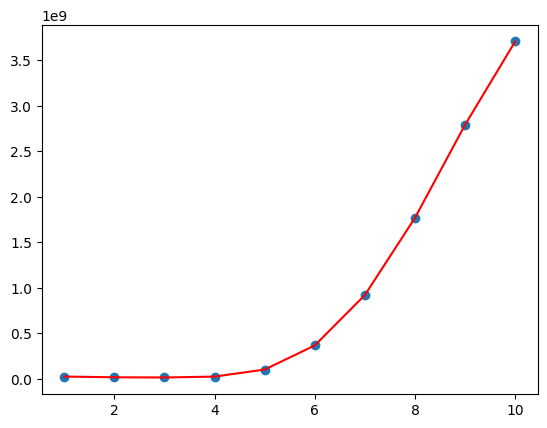

In [27]:
mse = poly_plot(10)

### 代码开始 ### (≈ 2 行代码)
plt.plot([i for i in range(1, 11)], mse, 'r')
plt.scatter([i for i in range(1, 11)], mse)
### 代码结束 ###



In [28]:
model = make_pipeline(PolynomialFeatures(4,include_bias=False),LinearRegression()) 
model.fit(X_train,y_train)
y_pre= model.predict(X_test)
mean_squared_error(y_test,y_pre)

23772223.11810328

In [29]:
X_train

,btc_total_bitcoins,btc_transaction_fees
0,2110700.0,0.000000
1,2120200.0,0.000000
2,2127600.0,0.000000
3,2136100.0,0.000000
4,2144750.0,0.000000
...,...,...
2038,14645050.0,27.900742
2039,14648675.0,24.265468
2040,14652725.0,27.125537
2041,14656525.0,25.689093


In [30]:
PolynomialFeatures(2,include_bias=False).fit_transform(X_train)

array([[2.11070000e+06, 0.00000000e+00, 4.45505449e+12, 0.00000000e+00,
        0.00000000e+00],
       [2.12020000e+06, 0.00000000e+00, 4.49524804e+12, 0.00000000e+00,
        0.00000000e+00],
       [2.12760000e+06, 0.00000000e+00, 4.52668176e+12, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [1.46527250e+07, 2.71255370e+01, 2.14702350e+14, 3.97463035e+08,
        7.35794760e+02],
       [1.46565250e+07, 2.56890934e+01, 2.14813725e+14, 3.76512840e+08,
        6.59929520e+02],
       [1.46601250e+07, 2.09869371e+01, 2.14919265e+14, 3.07671121e+08,
        4.40451528e+02]])

In [36]:
ll=[[1,2], [2, 4], [3, 6]]
PolynomialFeatures(3,include_bias=False).fit_transform(ll)


array([[  1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  2.,   4.,   4.,   8.,  16.,   8.,  16.,  32.,  64.],
       [  3.,   6.,   9.,  18.,  36.,  27.,  54., 108., 216.]])